In [1]:
import numpy as np
from tensorflow import keras
from tensorflow.keras import layers
import random
import matplotlib.pyplot as plt

In [2]:
def get_item(p):  # Function of generation random bits array with lenth 8
    noise = np.random.rand(8) < p
    binary_string = ''.join(str(int(b)) for b in noise)
    result_integer = int(binary_string, 2)
    return result_integer

In [3]:
p = 5e-3  # Bit error probability

data = np.array([[random.getrandbits(8), random.getrandbits(8), random.getrandbits(8), random.getrandbits(8)] for _ in range(1000000)])
noise = np.array([[get_item(p), get_item(p), get_item(p), get_item(p)] for _ in range(1000000)])
noisy_data = data ^ noise  # XOR multiplication of noise and input message

# Reshape data to fit RNN input shape (samples, timesteps, features)
data = data.reshape((1000000, 4, 1))  # 1000 samples, 3 timesteps, 1 feature
noisy_data = noisy_data.reshape((1000000, 4, 1))  # 1000 samples, 3 timesteps, 1 feature

In [5]:
# Build the RNN model
model = keras.Sequential()
model.add(layers.SimpleRNN(50, activation='sigmoid', input_shape=(4, 1)))  # RNN layer
model.add(layers.Dense(4))  # Output layer

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(noisy_data, data, epochs=10, batch_size=64)

Epoch 1/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 9s 529us/step - loss: 8142.7876
Epoch 2/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 9s 544us/step - loss: 199.7259
Epoch 3/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 535us/step - loss: 122.6384
Epoch 4/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 528us/step - loss: 118.4677
Epoch 5/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 530us/step - loss: 118.6246
Epoch 6/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 8s 519us/step - loss: 115.9144
Epoch 7/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 9s 581us/step - loss: 116.0820
Epoch 8/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 9s 582us/step - loss: 114.7838
Epoch 9/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 9s 574us/step - loss: 116.4417
Epoch 10/10
15625/15625 ━━━━━━━━━━━━━━━━━━━━ 9s 577us/step - loss: 115.2729


In [6]:
ber_ber = np.zeros(101)
for i in range(101):
    summ_bit_error = 0
    for j in range(100):
        data = np.array([random.getrandbits(8), random.getrandbits(8), random.getrandbits(8), random.getrandbits(8)]).reshape((1, 4, 1))
        noise = np.array([get_item(i/10000), get_item(i/10000), get_item(i/10000), get_item(i/10000)]).reshape((1, 4, 1))
        noisy_data = data ^ noise

        predicted = model.predict(noisy_data).reshape((1, 4, 1)).astype(int)

        errors = predicted ^ data
        summ_bit_error += sum([bin(item[0]).count('1') for item in errors[0]])
    
    ber_ber[i] = summ_bit_error


        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━

In [7]:
x = [i/10000 for i in range(101)]

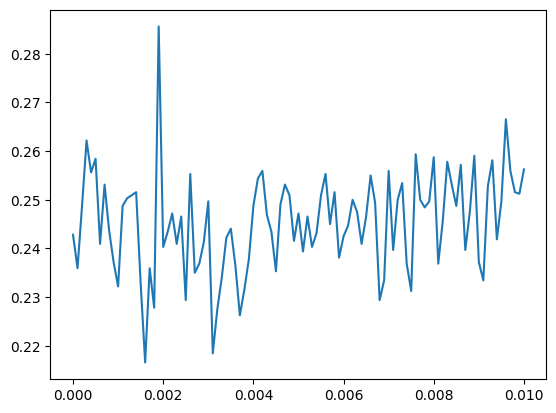

In [8]:
plt.plot(x, ber_ber/(100*32))